# SVM

In [2]:
import pandas as pd
import numpy as np
import csv
from sklearn.svm import SVC
from matplotlib  import cm
#from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

u'/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/codigo'

In [4]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/andSVM.csv")
df.describe()

,X1,X2,y
count,42.000000,42.000000,42.000000
mean,1.000000,0.857143,0.428571
std,1.082004,1.260496,0.500870
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000
max,3.000000,3.000000,1.000000


In [5]:
X_train=np.asarray(df[["X1",'X2']])
X_test=np.asarray(X_train)
Y_train=np.asarray(df['y'])
Y_test=np.asarray(Y_train)

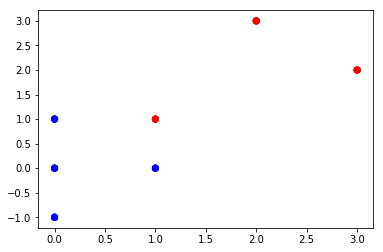

In [7]:
plt.scatter(X_train[:,0],X_train[:,1],c=['red' if i==1 else 'blue' for i in Y_train])


In [8]:
from sklearn.metrics import confusion_matrix
clf = SVC(C=10,kernel='linear')
clf.fit(X_train, Y_train)
cm = confusion_matrix(Y_test, clf.predict(X_test))
print(cm)



[[24  0]
 [ 0 18]]


In [10]:
print clf.support_vectors_
print clf.dual_coef_


[[0. 1.]
 [1. 0.]
 [1. 1.]]
[[-2. -2.  4.]]


In [14]:
print clf.coef_, clf.intercept_

[[2. 2.]] [-3.]


-1.0000000000000002


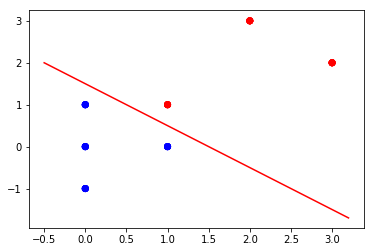

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=['red' if i==1 else 'blue' for i in Y_train])
x = np.linspace(-0.5,3.2,100) # 100 numeros espaciados
m=-clf.coef_[0][0]/clf.coef_[0][1]
b=-clf.intercept_/clf.coef_[0][0]
plt.plot(x,b+m*x,color='red')
print m

##### Jugando con los datos de entrada podemos ver que con la regresión logistica hay cambios en la recta y con el SVM no (si no cambiamos los vectores de soporte)

Point slope formula: $y-y_1=m(x-x_1)$


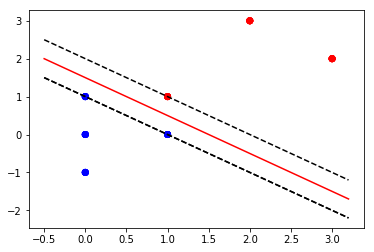

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c=['red' if i==1 else 'blue' for i in Y_train])

x = np.linspace(-0.5,3.2,100) # 100 numeros espaciados
plt.plot(x,b+m*x,color='red')
for vs in  clf.support_vectors_:
    plt.plot(x,vs[0]+m*(x-vs[1]),'k--') 


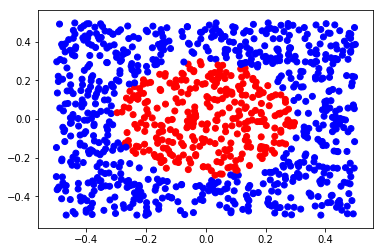

In [11]:
import math
import random as rnd
X=np.asarray([[rnd.random()-0.5,rnd.random()-0.5] for i in range(1000)])
y=np.asarray([[1] if math.sqrt(x1**2+x2**2)>=0.3 else [0] for x1,x2 in X])
plt.scatter(X[:,0],X[:,1],c=['red' if i<=0 else 'blue' for i in y] )

In [13]:
from sklearn.svm import SVC
clf = SVC(C=10,kernel='rbf')
clf.fit(X,[i[0] for i in y])
#cm = confusion_matrix(df['y'], clf.predict(df[['X1','X2']]))
testx=np.asarray([[rnd.random()-0.5,rnd.random()-0.5] for i in range(1000)])
#testy=np.asarray([[1] if math.sqrt(x[:,0]**2+x[:,1]**2)>=0.3 else [0] for x in testx])
testy=np.asarray([[1] if math.sqrt(x[0]**2+x[1]**2)>=0.3 else [0] for x in testx])

cm = confusion_matrix(testy, clf.predict(testx))
print(cm)


[[291   1]
 [ 10 698]]


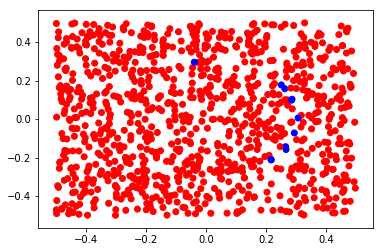

In [14]:
plt.scatter(testx[:,0],testx[:,1], color= ['red' if y_ == y    else 'blue' for y_, y in zip(clf.predict(testx),testy)])

In [15]:
color=[]
for x,ytrue in zip(testx,testy):


    if clf.predict([x])==ytrue and ytrue==1:
        color+=['black']
    elif clf.predict([x])==ytrue and ytrue==0:
        color+=['blue']
    else:
        color+=['red']
    #color= color + ['red' if clf.predict(x) <0.5  and  else 'blue']
    #print net.activate(x)
    
    
#plt.scatter(testx[:,0],testx[:,1],c=color)

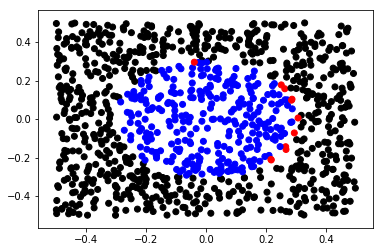

In [16]:
plt.scatter(testx[:,0],testx[:,1], color= color)